### BIGRAM

In [3]:
words = open('../names.txt', 'r').read().splitlines()

In a bigram language model, we are always looking into dealing with two characters at a time. We are given a single character and then we sort of predict the second character it follows. We are just looking at the previous character to predict the next character

In [8]:
for word in words[:3]:
    print(word)
    for ch1, ch2 in zip(word, word[1:]):
        print(ch1,ch2)

emma
emma mma
e m
emma mma
m m
emma mma
m a
olivia
olivia livia
o l
olivia livia
l i
olivia livia
i v
olivia livia
v i
olivia livia
i a
ava
ava va
a v
ava va
v a


This works because word is **emma** and word[1:] is **mma** and zip takes two iterators and it pairs them up and then creates an iterator over the tuples of their consecutive entries. 

_If any one of these lists is shorter than the other, it halts and returns_

In [14]:
for word in words[:3]:
    print('\n'+ word)
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1,ch2)


emma
<S> e
e m
m m
m a
a <E>

olivia
<S> o
o l
l i
i v
v i
i a
a <E>

ava
<S> a
a v
v a
a <E>


Here we conclude that the e is the bigram of a and a is the special end character and the e is start one

But to have a concreate approach to this, we need to look at this statistically and this can be achieved by counting it. For this we will be making use of a dictionary thats going to maintain some counts for every one of these bigrams. The dictionary will map these bigrams so that bigram is a tuple of character1 and character2

In [17]:
bigram_dictionary = {}
for word in words[:3]:
    print('\n'+ word)
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        bigram_dictionary[bigram] = bigram_dictionary.get(bigram, 0 ) + 1
        # this is similar to bigram_dictionary[bigram] but to set a default value if the value going to be accessed is not found. Here default value is 0
        print(ch1,ch2)
bigram_dictionary


emma
<S> e
e m
m m
m a
a <E>

olivia
<S> o
o l
l i
i v
v i
i a
a <E>

ava
<S> a
a v
v a
a <E>


{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

so here we checked how many times a particular bigram has appeared. Here we see the ending with letter ```'a'``` has happened 3 times since all the 3 words end with ```'a'```

In [19]:
# Getting statistics of the entire data set 
bigram_dictionary = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        bigram_dictionary[bigram] = bigram_dictionary.get(bigram, 0 ) + 1
        # this is similar to bigram_dictionary[bigram] but to set a default value if the value going to be accessed is not found. Here default value is 0
bigram_dictionary

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [20]:
bigram_dictionary.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [23]:
sorted(bigram_dictionary.items(), key = lambda keyValue: keyValue[1], reverse=True) # we need to sort by the values (second elements of the tuple)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

We are going to store this in a 2D array using ```PyTorch```<br>
```rows```: first character of bigram<br>
```columns```: 2nd character<br>
each element ```[i][j]```: the number of times the first character is followed by the 2nd one


In [24]:
import torch

In [25]:
a = torch.zeros((3,5))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [26]:
a.dtype

torch.float32

since they are single precision floating point numbers

In [28]:
# to mention it is of type integer

a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [29]:
a.dtype

torch.int32

In [31]:
a[1,2] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

With respect to our problem, we have 26 characters along with 2 special characters ```<S>``` and ```<E>```. Therefore our 2D array will be ```28 by 28```

In [33]:
N = torch.zeros((28,28), dtype=torch.int32) # storing the counts

Since we have the strings inside the words, we need a lookup table to connect the strings to these counts

In [37]:
set(''.join(words)) # set will be the set of all lower case characters
# this will be a set of 26 characters, coz on ignoring the duplicates we are left with all the characters in english which is 26

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [44]:
charactersList = sorted(list(set(''.join(words))))
#string to integer mapping
stoi = {s:i for i,s in enumerate(charactersList)}
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [47]:
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ch1toi = stoi[ch1]
        ch2toi = stoi[ch2]
        N[ch1toi,ch2toi] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  836,  161,  182,
         2050,  435,    0, 6646],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          771, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

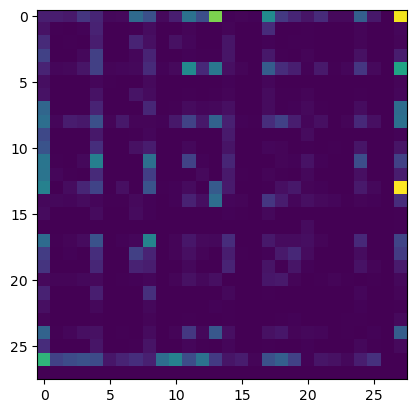

In [49]:
# to make it more elegant we could use a matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(N) # the 28 x 28 array image

In [50]:
itos = {i:s for s,i in stoi.items()}

(-0.5, 27.5, 27.5, -0.5)

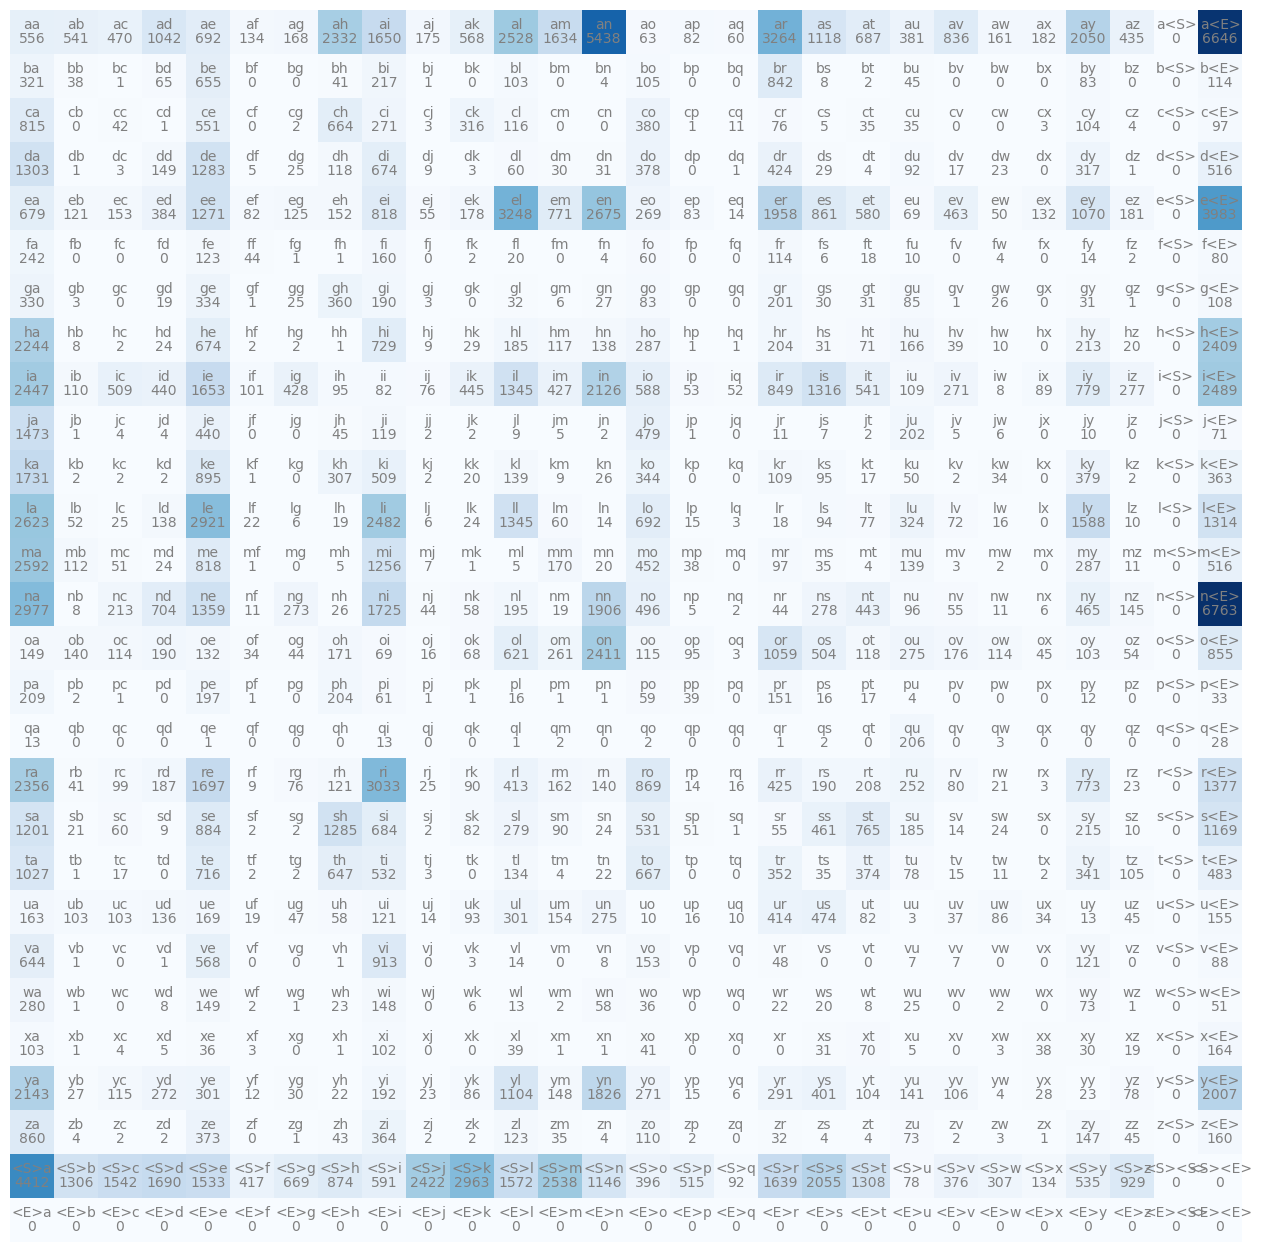

In [51]:
# to make it more elegant we could use a matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues') # the 28 x 28 array image

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]

        plt.text(j, i, chstr, ha='center', va = 'bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va = 'top', color='gray')

plt.axis('off')

It is iterated through each individual cells and i create a character string that is a concatination of the follower and the followeee basically the bigram along with the count below it
```
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va = 'bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va = 'top', color='gray')
```

If we look at the above picture carefully we will see that each of the column will have the ending character same.. Ist column ends with a, 2nd b and so on for the 26 characters. 

But there is an unnecessary work done here. The last 2 columns and 2 rows are basically the starting and ending ones and we see that the last column and the last row are entirely zeros and thats because starting characters cant be at position 1 and ending characters cant be at position length-1

In [57]:
print(N[3,3])
print(type(N[3,3])) # This is a tensor
print(type(N[3,3].item())) 
print((N[3,3].item())) 

tensor(149, dtype=torch.int32)
<class 'torch.Tensor'>
<class 'int'>
149


#### Improving the code